In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

 Salary column has 67 null values. Using salary mean to fill the null values.  

In [8]:
df['salary'].fillna(df['salary'].mean(), inplace=True)

**Splitting data in to two sets categorical and numerical for EDA.**

In [9]:
categorical_feat = df.select_dtypes(include=['object'])
numerical_feat = df.select_dtypes(include=['float64'])

# Numerical Feature Analysis

In [10]:
fig = px.scatter(numerical_feat, x='ssc_p', y='hsc_p', color='degree_p', size = 'etest_p', hover_data=['mba_p'])
fig.show()

In [11]:
fig = px.scatter(numerical_feat, x='ssc_p', color=df['status'], height=500, width=600, title='SSC Percentage VS Status',trendline="ols")
fig.show()

fig = px.scatter(numerical_feat, x='hsc_p', color=df['status'], height=500, width=600, title='HSC Percentage VS Status',trendline="ols")
fig.show()

fig = px.scatter(numerical_feat, x='degree_p', color=df['status'], height=500, width=600, title='Degree Percentage VS Status',trendline="ols")
fig.show()

fig = px.scatter(numerical_feat, x='etest_p', color=df['status'], height=500, width=600, title='Employability test Percentage VS Status',trendline="ols")
fig.show()

fig = px.scatter(numerical_feat, x='mba_p', color=df['status'], height=500, width=600, title='MBA Percentage VS Status',trendline="ols")
fig.show()

In [12]:
fig = px.scatter(x = numerical_feat['salary'].value_counts().index, y=numerical_feat['salary'].value_counts())
fig.show()

# Univariate Analysis Of Categorical Features

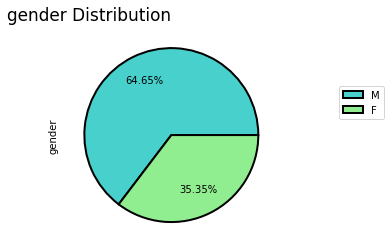

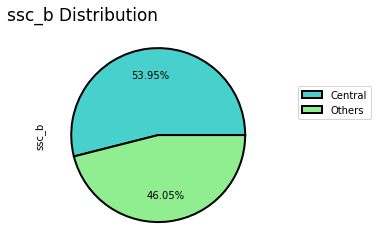

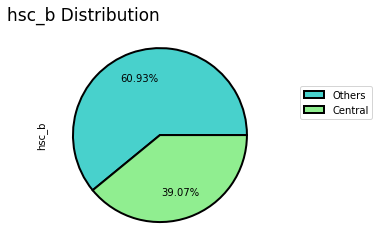

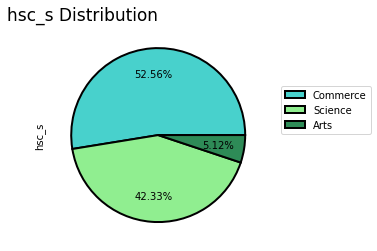

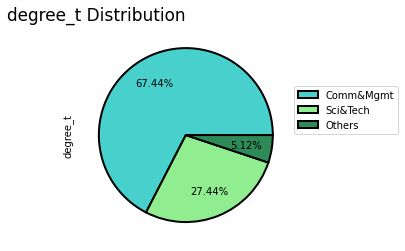

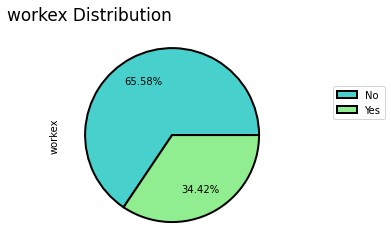

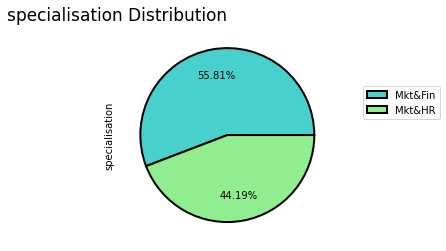

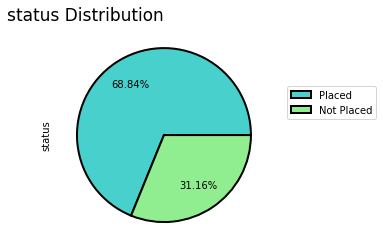

In [13]:
colors=['mediumturquoise','lightgreen','seagreen','palegreen','olive']

for col in categorical_feat:
    plt.figure()
    categorical_feat[col].value_counts().plot.pie(wedgeprops={"edgecolor":"k",'linewidth': 2},textprops={'color':'k'}, pctdistance=0.7, autopct='%.2f%%',
                                                 figsize=(5,5), labels=None, subplots=True, colors=colors)
    plt.title('{} Distribution'.format(col), fontsize=17, ha='right')
    plt.legend(labels=categorical_feat[col].value_counts().index, loc='best', bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()

In [14]:
categorical_feat = categorical_feat.drop('status',1)

# Bivariate Analysis Of Categorical Features

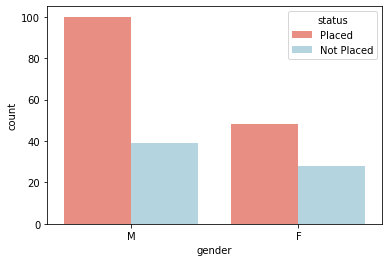

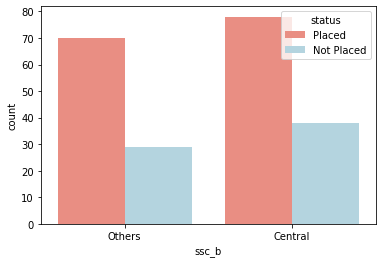

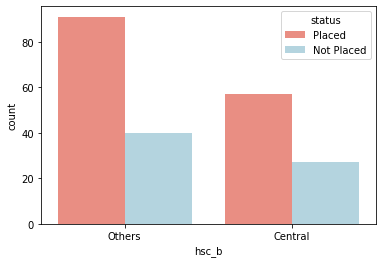

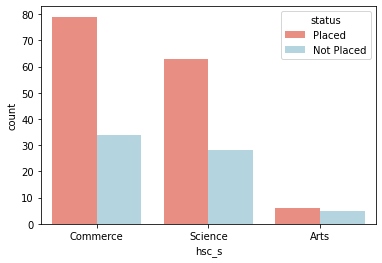

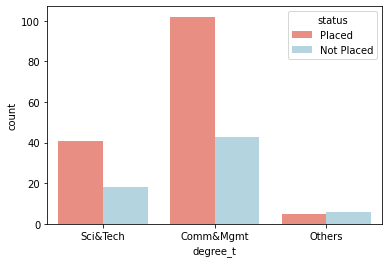

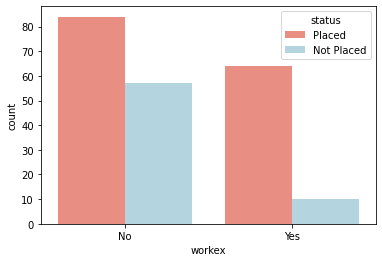

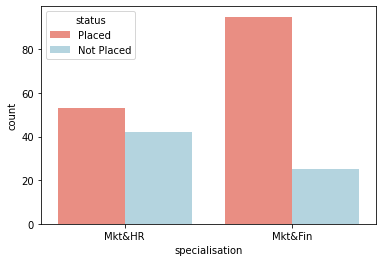

In [15]:
for col in categorical_feat:
    sns.countplot(x = categorical_feat[col], hue=df['status'], palette =['salmon','lightblue'])
    plt.show()

# Label Encoding

In [16]:
# Using Label encoding to convert categorical values into numerical values as many algorithms can't handle categorical values.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
gender = le.fit_transform(df['gender'])
ssc_b = le.fit_transform(df['ssc_b'])
hsc_b = le.fit_transform(df['hsc_b'])
degree_t = le.fit_transform(df['degree_t'])
workex = le.fit_transform(df['workex'])
specialisation = le.fit_transform(df['specialisation'])
status = le.fit_transform(df['status'])

In [17]:
# droping columns

df.drop(['sl_no','gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation','status'],1,inplace=True)

# Feature Scaling
I will use Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
#df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']] = StandardScaler().fit_transform(df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']])

In [19]:
# Appending Label encoded columns to dataframe

df['gender'] = gender
df['ssc_b'] = ssc_b
df['hsc_b'] = hsc_b
df['degree_t'] = degree_t
df['workex'] = workex
df['specialisation'] = specialisation
df['status'] = status
df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,1,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,0,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,0,0,0,0,1


# Correlation with Heatmap

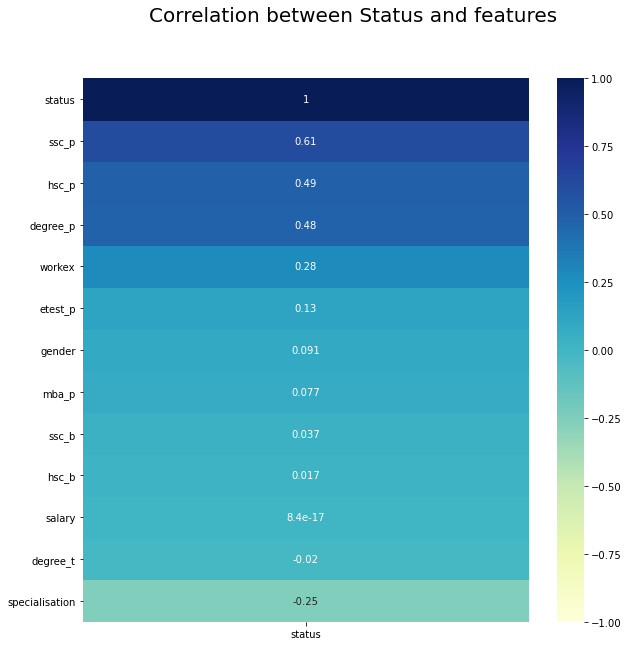

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Correlation between Status and features',fontsize=20)
ax=sns.heatmap(df.corr()[["status"]].sort_values("status"),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

In [21]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [22]:
print(x.shape)
print(y.shape)

(215, 12)
(215,)


In [23]:
accuracies = dict()

# Classification Models

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

#Make prediction
y_pred = reg.predict(x_test)

from sklearn.metrics import accuracy_score
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.627906976744186


** Confusion Matrix Of Logistic Regression**

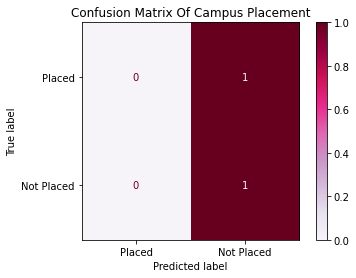

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(reg, x_test, y_test, display_labels=['Placed','Not Placed'], cmap=plt.cm.PuRd, normalize='true')
plt.title('Confusion Matrix Of Campus Placement')
plt.show()

# Kernel SVM

In [26]:
from sklearn.svm import SVC


classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracies['Kernel SVM'] = accuracy_score(y_test, y_pred)
print('Accuray is: '+str(accuracy_score(y_test, y_pred)))

Accuray is: 0.627906976744186


**Confusion Matrix Of Kernel SVM**

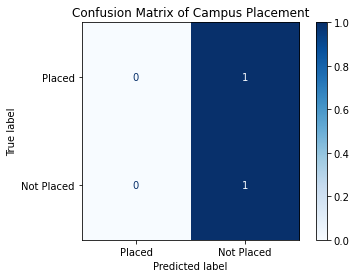

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, x_test, y_test, display_labels=['Placed','Not Placed'], cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix of Campus Placement')
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

from sklearn.metrics import accuracy_score

accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
print('Accuray is: '+str(accuracy_score(y_test, y_pred)))

Accuray is: 1.0


**Confusion Matrix Of Naive Bayes**

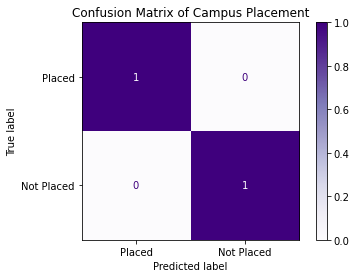

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, x_test, y_test, display_labels=['Placed','Not Placed'], cmap=plt.cm.Purples, normalize='true')
plt.title('Confusion Matrix of Campus Placement')
plt.show()

# KNeighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracies['KNeighbors Classifier'] = accuracy_score(y_test, y_pred)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.9534883720930233


**Confusion Matrix Of KNeighbors Classifier**

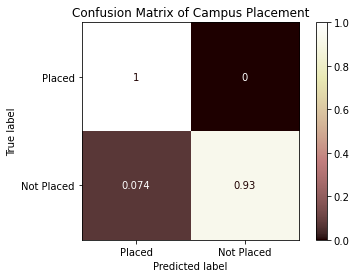

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, x_test, y_test, display_labels=['Placed','Not Placed'], cmap=plt.cm.pink, normalize='true')
plt.title('Confusion Matrix of Campus Placement')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
dtc.fit(x_train, y_train)

#Make Prediction
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

accuracies['Decision Tree Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.627906976744186


****Confusion Matrix Of Decision Tree Classifier

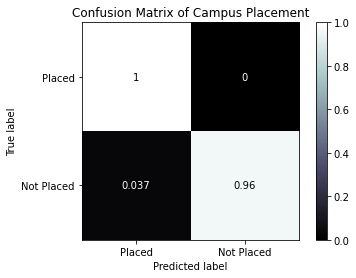

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc, x_test, y_test, display_labels=['Placed','Not Placed'], cmap=plt.cm.bone, normalize='true')
plt.title('Confusion Matrix of Campus Placement')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 2, random_state= 0)
rfc.fit(x_train, y_train)

#Make Prediction
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

accuracies['Random Tree Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.627906976744186


**Confusion Matrix** Of Random Forest Classifier

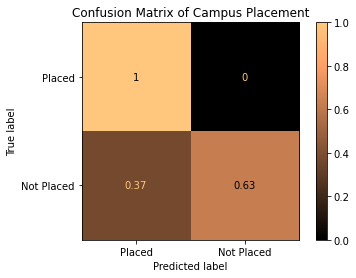

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, x_test, y_test, display_labels=['Placed','Not Placed'], cmap=plt.cm.copper, normalize='true')
plt.title('Confusion Matrix of Campus Placement')
plt.show()

In [36]:
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model Name','Accuracy Score'])
accuracy_df

,Model Name,Accuracy Score
0,Logistic Regression,0.627907
1,Kernel SVM,0.627907
2,Naive Bayes,1.000000
3,KNeighbors Classifier,0.953488
4,Decision Tree Classification,0.627907
5,Random Tree Classification,0.627907


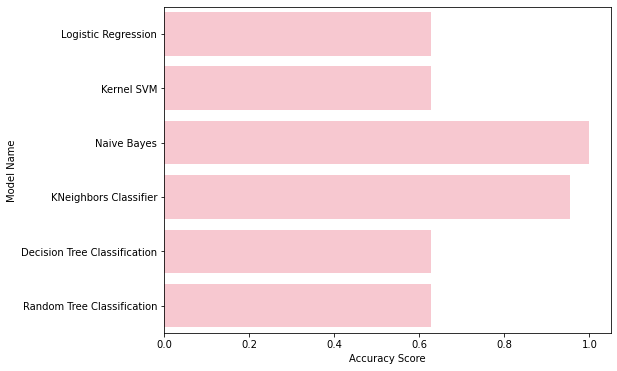

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes('pastel')
sns.barplot(y='Model Name', x='Accuracy Score', data=accuracy_df, color='pink')
plt.show()